In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

from ipynb_path import *

In [2]:
from counterfactual.import_essentials import *
from counterfactual.evaluate import load_trained_model, model_cf_gen
from counterfactual.net import AdvCounterfactualModel
from counterfactual.adversarial_experiment import *
from tqdm.notebook import tqdm

# plt.style.use(['science',  'bright'])
plt.style.use(['science',  'vibrant'])



In [3]:
import wandb
run = wandb.init()


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: birkhoffg (use `wandb login --relogin` to force relogin)


## T Steps

In [12]:
validity_changes = [ 
    run.use_artifact('birkhoffg/adv-counternet/run-1zyakm2c-ValidityChanges:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-jh6lfcjq-ValidityChanges:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-3ghyhzin-ValidityChanges:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-1il2lydk-ValidityChanges:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-3vjwv2as-ValidityChanges:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-1mknvgq2-ValidityChanges:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-2f0yxgo3-ValidityChanges:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-m4t1grl8-ValidityChanges:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-3kggohy1-ValidityChanges:v0', type='run_table').download(), 
]
n_steps = [1, 2, 3, 5, 7, 10, 13, 15, 20]

In [13]:
validity_changes = [ 
    run.use_artifact('birkhoffg/adv-counternet/run-2phfx39e-ValidityChanges:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-2nkosubw-ValidityChanges:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-arbthsak-ValidityChanges:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-3l33zzi7-ValidityChanges:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-1kfeexnf-ValidityChanges:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-1yvcejcb-ValidityChanges:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-2a4yncpj-ValidityChanges:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-1u57mk8b-ValidityChanges:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-2fx9da4q-ValidityChanges:v0', type='run_table').download(), 
]
n_steps = [1, 2, 3, 5, 7, 10, 13, 15, 20]

In [14]:
def path2df(x):
    with open(Path(x) / 'Validity Changes.table.json')  as f:
        val_changes = json.load(f)
        return pd.DataFrame(data=val_changes['data'], columns=val_changes['columns']).set_index('stat')

In [15]:
validity_changes_dfs = list(map(path2df, validity_changes))
assert len(validity_changes_dfs) == len(n_steps)

In [16]:
cf_metrics = [ 
    run.use_artifact('birkhoffg/adv-counternet/run-1zyakm2c-CFMetrics:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-jh6lfcjq-CFMetrics:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-3ghyhzin-CFMetrics:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-1il2lydk-CFMetrics:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-3vjwv2as-CFMetrics:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-1mknvgq2-CFMetrics:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-2f0yxgo3-CFMetrics:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-m4t1grl8-CFMetrics:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-3kggohy1-CFMetrics:v0', type='run_table').download(), 
]
n_steps = [1, 2, 3, 5, 7, 10, 13, 15, 20]

In [17]:
cf_metrics = [ 
    run.use_artifact('birkhoffg/adv-counternet/run-2phfx39e-CFMetrics:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-2nkosubw-CFMetrics:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-arbthsak-CFMetrics:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-3l33zzi7-CFMetrics:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-1kfeexnf-CFMetrics:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-1yvcejcb-CFMetrics:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-2a4yncpj-CFMetrics:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-1u57mk8b-CFMetrics:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-2fx9da4q-CFMetrics:v0', type='run_table').download(), 
]
n_steps = [1, 2, 3, 5, 7, 10, 13, 15, 20]

In [18]:
def path2df(x):
    with open(Path(x) / 'CF Metrics.table.json')  as f:
        cf_metrics = json.load(f)
        return pd.DataFrame(data=cf_metrics['data'], columns=cf_metrics['columns']).set_index('stat')

cf_metrics_dfs = list(map(path2df, cf_metrics))
assert len(cf_metrics_dfs) == len(n_steps)

In [19]:
def plot_n_steps_validity(n_steps, cf_metrics_list, metric_name):
    fig, ax = plt.subplots(figsize=(4,3))
    x = np.array(n_steps)
    y = np.array([df[metric_name]['mean'] for df in cf_metrics_list])
    err = np.array([df[metric_name]['std'] / 2 for df in cf_metrics_list])
    ax.errorbar(
        x, y, err, fmt='o-', capsize=5, label="RoCourseNet"
    )
    data = {
        'x': x,
        'y1': y - err,
        'y2': y + err}
    plt.fill_between(**data, alpha=.25)
    ax.set_xlabel('Attacker Steps')
    ax.set_ylabel('Robust Validity')
    ax.set_ylim((0.7, 1.04))
    ax.set_xticks(x)
    ax.legend(loc="lower left")
    return fig


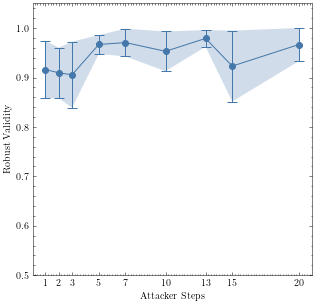

In [13]:
plot_n_steps_validity(n_steps, validity_changes_dfs, 'cf_validity (w=1)').savefig("images/rob-validity-w=1.pdf")

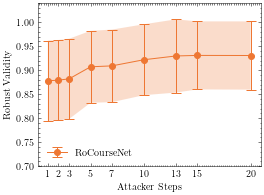

In [20]:
plot_n_steps_validity(n_steps, validity_changes_dfs, 'cf_validity (all)').savefig("images/rob-validity_steps.pdf")

In [21]:
def plot_n_steps_proximity(n_steps, cf_metrics_list, metric_name):
    fig, ax = plt.subplots(figsize=(4,3))
    x = np.array(n_steps)
    y = np.array([df[metric_name]['mean'] for df in cf_metrics_list])
    err = np.array([df[metric_name]['std'] / 2 for df in cf_metrics_list])
    ax.errorbar(
        x, y, err, fmt='o-', capsize=5,  label="RoCourseNet"
    )
    data = {
        'x': x,
        'y1': y - err,
        'y2': y + err}
    plt.fill_between(**data, alpha=.25)
    ax.set_xlabel('Attacker Steps')
    ax.set_ylabel('Proximity')
    ax.set_xticks(x)
    ax.legend(loc="lower right")
    return fig



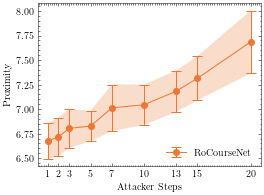

In [22]:
plot_n_steps_proximity(n_steps, cf_metrics_dfs, "proximity").savefig('images/proximity_steps.pdf')

### $l_2$ norm

In [29]:
validity_changes = [ 
    run.use_artifact('birkhoffg/adv-counternet/run-32qzpdk1-ValidityChanges:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-1kccmztl-ValidityChanges:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-9vcom1c5-ValidityChanges:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-3mf7rcg7-ValidityChanges:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-3mbehdzf-ValidityChanges:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-2ldlw6t2-ValidityChanges:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-29cn7gmy-ValidityChanges:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-206sev4c-ValidityChanges:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-2zwdjauf-ValidityChanges:v0', type='run_table').download(), 
]
n_steps = [1, 2, 3, 5, 7, 10, 13, 15, 20]


In [31]:
def path2df(x):
    with open(Path(x) / 'Validity Changes.table.json')  as f:
        val_changes = json.load(f)
        return pd.DataFrame(data=val_changes['data'], columns=val_changes['columns']).set_index('stat')

validity_changes_dfs = list(map(path2df, validity_changes))
assert len(validity_changes_dfs) == len(n_steps)

In [32]:
cf_metrics = [ 
    run.use_artifact('birkhoffg/adv-counternet/run-32qzpdk1-CFMetrics:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-1kccmztl-CFMetrics:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-9vcom1c5-CFMetrics:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-3mf7rcg7-CFMetrics:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-3mbehdzf-CFMetrics:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-2ldlw6t2-CFMetrics:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-29cn7gmy-CFMetrics:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-206sev4c-CFMetrics:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-2zwdjauf-CFMetrics:v0', type='run_table').download(), 
]
n_steps = [1, 2, 3, 5, 7, 10, 13, 15, 20]

In [34]:
def path2df(x):
    with open(Path(x) / 'CF Metrics.table.json')  as f:
        cf_metrics = json.load(f)
        return pd.DataFrame(data=cf_metrics['data'], columns=cf_metrics['columns']).set_index('stat')

cf_metrics_dfs = list(map(path2df, cf_metrics))
assert len(cf_metrics_dfs) == len(n_steps)

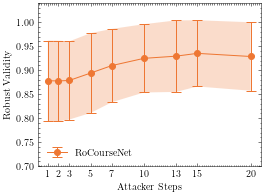

In [33]:
plot_n_steps_validity(n_steps, validity_changes_dfs, 'cf_validity (all)').savefig("images/rob-validity_steps_l2.pdf")

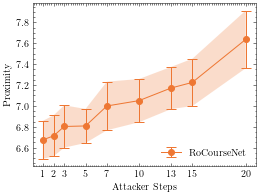

In [35]:
plot_n_steps_proximity(n_steps, cf_metrics_dfs, "proximity").savefig('images/proximity_steps_l2.pdf')

## Epsilon $\epsilon$

In [43]:
validity_changes = [ 
    run.use_artifact('birkhoffg/adv-counternet/run-2swl5110-ValidityChanges:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-2ppe4csq-ValidityChanges:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-3aegguvs-ValidityChanges:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-1tfxmo54-ValidityChanges:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-dbydn81p-ValidityChanges:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-1nnozxgp-ValidityChanges:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-399n5949-ValidityChanges:v0', type='run_table').download(), 
]
epsilons = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5]

In [44]:
def path2df(x):
    with open(Path(x) / 'Validity Changes.table.json')  as f:
        val_changes = json.load(f)
        return pd.DataFrame(data=val_changes['data'], columns=val_changes['columns']).set_index('stat')

In [45]:
validity_changes_dfs = list(map(path2df, validity_changes))
assert len(validity_changes_dfs) == len(epsilons)

In [46]:
cf_metrics = [ 
    run.use_artifact('birkhoffg/adv-counternet/run-2swl5110-CFMetrics:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-2ppe4csq-CFMetrics:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-3aegguvs-CFMetrics:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-1tfxmo54-CFMetrics:v0', type='run_table').download(),
    run.use_artifact('birkhoffg/adv-counternet/run-dbydn81p-CFMetrics:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-1nnozxgp-CFMetrics:v0', type='run_table').download(), 
    run.use_artifact('birkhoffg/adv-counternet/run-399n5949-CFMetrics:v0', type='run_table').download(), 

]
epsilons = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5]

In [47]:
def path2df(x):
    with open(Path(x) / 'CF Metrics.table.json')  as f:
        val_changes = json.load(f)
        return pd.DataFrame(data=val_changes['data'], columns=val_changes['columns']).set_index('stat')

In [48]:
cf_metrics_dfs = list(map(path2df, cf_metrics))
assert len(cf_metrics_dfs) == len(epsilons)

In [49]:
def plot_eps_validity(epsilons, cf_metrics_list, metric_name):
    fig, ax = plt.subplots(figsize=(4,3))
    x = np.arange(1, len(epsilons)+1)
    y = np.array([df[metric_name]['mean'] for df in cf_metrics_list])
    err = np.array([df[metric_name]['std'] / 2 for df in cf_metrics_list])
    ax.errorbar(
        x, y, err, fmt='o-', capsize=5,  label="RoCourseNet"
    )
    data = {
        'x': x,
        'y1': y - err,
        'y2': y + err}
    plt.fill_between(**data, alpha=.25)
    ax.set_xlabel('Maximum Perturbation')
    ax.set_ylabel('Robust Validity')
    ax.set_ylim((0.7, 1.04))
    ax.set_xticks(x)
    ax.set_xticklabels([str(eps) for eps in epsilons])
    ax.legend(loc='lower left')
    return fig
    
    # fig, ax = plt.subplots(figsize=(5,5))
    # x = np.arange(1, len(epsilons)+1)
    # y = [df[metric_name]['mean'] for df in cf_metrics_list]
    # err = [df[metric_name]['std'] / 2 for df in cf_metrics_list]
    # ax.errorbar(
    #     x, y, err, fmt='o-', capsize=5
    # )
    # ax.set_xlabel('Maximum Perturbation')
    # ax.set_ylabel('Robust Validity')
    # ax.set_xticks(x)
    # ax.set_xticklabels([str(eps) for eps in epsilons])
    # return fig


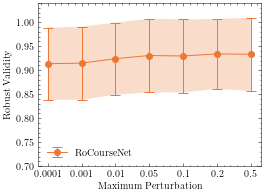

In [50]:
plot_eps_validity(epsilons, validity_changes_dfs, 'cf_validity (all)').savefig('images/rob-validity_eps.pdf')

In [52]:
def plot_eps_proximity(epsilons, cf_metrics_list, metric_name):
    fig, ax = plt.subplots(figsize=(4,3))
    x = np.arange(1, len(epsilons)+1)
    y = np.array([df[metric_name]['mean'] for df in cf_metrics_list])
    err = np.array([df[metric_name]['std'] / 2 for df in cf_metrics_list])
    ax.errorbar(
        x, y, err, fmt='o-', capsize=5, label="RoCourseNet"
    )
    data = {
        'x': x,
        'y1': y - err,
        'y2': y + err}
    plt.fill_between(**data, alpha=.25)
    ax.set_xlabel('Maximum Perturbation')
    ax.set_ylabel('Proximity')
    # ax.set_ylim((0.7, 1.04))
    ax.set_xticks(x)
    ax.set_xticklabels([str(eps) for eps in epsilons])
    ax.legend()
    return fig

    # fig, ax = plt.subplots(figsize=(5,5))
    # x = np.arange(1, len(epsilons)+1)
    # y = [df[metric_name]['mean'] for df in cf_metrics_list]
    # err = [df[metric_name]['std'] / 2 for df in cf_metrics_list]
    # ax.errorbar(
    #     x, y, err, fmt='o-', capsize=5
    # )
    # ax.set_xlabel('$T$ Steps')
    # ax.set_ylabel('Proximity')
    # ax.set_xticks(x)
    # ax.set_xticklabels([str(eps) for eps in epsilons])

    # return fig



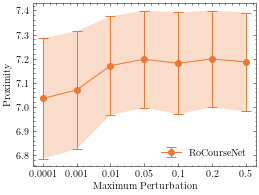

In [53]:
plot_eps_proximity(epsilons, cf_metrics_dfs, "proximity").savefig('images/proximity_eps.pdf')